<div class="alert alert-block" style="color: green">
    <h1><center> SUPERVISED LEARNING  </center></h1>

#### Name: Hugo Toth
#### E-mail: hu41go@gmail.com

<i>Machine learning</i> is a subfield of artificial intelligence that provides automatic, objective and data-driven techniques for modeling the data. Its two main branches are <i>supervised learning</i> and <i>unsupervised learning</i>, and in this exercise, we are going to use the former, <font color = green>supervised learning</font>, for classification and regression tasks.

The aim of this project is to answer questions like:

- What kind of model architecture best fits our data?
- How well does the model perform technically?
- Could we improve its performance?
- How do we evaluate the model's performance?

For classification, the dataset contains comprehensive health information from hospital patients with and without cardiovascular disease. The target variable "cardio," reflects the presence or absence of the disease, which is characterized by a buildup of fatty deposits inside the arteries (blood vessels) of the heart. Some data pre-processing steps are required to ensure that it's in an appropriate format so that models can learn from it.

--------------
The data has the following columns/attributes:

| Feature | Type | Explanation |
| :- | :- | :-
| age | numeric | The age of the patient in years 
| sex | binary | Female == 0, Male == 1
| height | numeric | Measured height of the patient (cm)
| weight | numeric | Measured weight of the patient (kg)
| ap_hi | numeric | Measured Systolic blood pressure
| ap_lo | numeric | Measured Diastolic blood pressure
| smoke | binary | A subjective feature based on asking the patient whether or not he/she smokes
| alco | binary | A subjective feature based on asking the patient whether or not he/she consumes alcohol
| active | binary |  A subjective feature based on asking the patient whether or not he/she exercises regularly
| cholesterol | categorical | Cholesterol associated risk information evaluated by a doctor
| gluc | categorical | Glucose associated risk information evaluated by a doctor

### <font color = red> Packages needed for this exercise: </font>

In [1]:
import numpy as np
import pandas as pd

# Visualization packages - matplotlib and seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning package - scikit-learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge

# Show the plots inline in the notebook
%matplotlib inline

______________
## <font color = lightcoral>1. Classification using k-nearest neighbors </font> 

We start exploring the world of data modeling by using the <font color = lightcoral>K-Nearest Neightbors (k-NN) algorithm</font>. The k-NN algorithm is a supervised machine learning technique based on the assumption that data points with similar features tend to belong to the same class, and thus are likely to be near each other in feature space.

In our case, we'll use the k-NN algorithm to *predict the presence of cardiovascular disease* (CVD) using all the other variables as <font color = lightcoral>features</font> in the given data set. I.e. the <font color = lightcoral>target variable</font> that we are interested in is `cardio`.

But first, we need to load the data for the project.

Then, we will take a random sample of 1000 rows from the dataframe using a fixed random seed and print the first 15 rows to check that everything is ok with the dataframe.

In [2]:
### Loading code provided

# Path for the data
data_path = 'cardio_data.csv'

# Read the CSV file 
cardio_data = pd.read_csv(data_path)

In [3]:
### Resample and print 15 rows

# random sample of 1000 rows from the dataframe using a fixed random seed
data = cardio_data.sample(n = 1000, random_state = 2003, ignore_index = True)
# sample function from the pandas documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html

# Print the first 15 rows
data.head(15)

,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_normal,cholesterol_at_risk,cholesterol_elevated,gluc_normal,gluc_at_risk,gluc_elevated
0,53,1,180,75.0,110,70,0,1,1,0,1,0,0,1,0,0
1,42,1,168,70.0,110,70,1,0,1,0,1,0,0,1,0,0
2,41,1,162,75.0,112,80,0,0,1,0,1,0,0,1,0,0
3,45,0,153,76.0,110,70,0,0,1,0,1,0,0,1,0,0
4,45,0,167,80.0,140,90,0,0,1,1,1,0,0,1,0,0
5,42,1,189,107.0,140,90,0,0,1,0,1,0,0,0,0,1
6,58,0,156,66.0,150,90,0,0,1,1,1,0,0,1,0,0
7,45,0,164,97.0,150,90,0,0,1,1,1,0,0,1,0,0
8,46,1,165,58.0,90,60,0,0,1,0,1,0,0,1,0,0
9,55,0,159,77.0,130,80,0,0,0,1,1,0,0,1,0,0


----

**1. A)** 

We have the data so now, let's put it to use. All the analyses will be done based on this sample of 1000.

To teach the k-NN algorithm to recognize patterns, we need <font color = lightcoral>training data</font>. However, to assess how well a model has learned these patterns, we require <font color = lightcoral>test data</font> which is new and unseen by the trained model. It's important to note that the test set is not revealed to the model until after the training is complete.

So, to *estimate the performance of a model*, we may use a basic <font color = lightcoral>train-test split</font>. 

We will gather the features into one array and the target variable into another array. Then, we will create training and test data by splitting the data into training (80%) and test (20%) sets, setting a fixed random seed to ensure that we will get the same split each time the cell is run (this enhances the reproducibility of our experiment).

In [4]:
### Train-test split

# Gather the features and the target variable
features = data.drop(columns = ['cardio']).values
target = data['cardio'].values

# Print the number of instances for each value of the target variable
data['cardio'].value_counts()

cardio
0    696
1    304
Name: count, dtype: int64

In [5]:
# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size = 0.2,
    shuffle = True,
    random_state = 2003,  # fixed random seed
    stratify = target
)
# train_test_split function from scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [6]:
# copies will be used in the bonus execrise
y_train_cvd = y_train 
y_test_cvd = y_test

<font color = lightcoral> I chose to use stratification for the dataset. We can see that there are more than double the amount of negative 'cardio' instances than positive ones. In the case of such a difference, it is important to stratify the target variable when splitting into train and test sets. This ensures that the same proportion of positive and negative instances is found in both sets and avoids situations like having only negative examples in the test set (this would be bad fot testing purposes).</font>

----------

**1. B)** 

Moving on, we should standardize the numerical features in both the train and test sets.

In k-NN, the model predicts whether or not a patient has cardiovascular disease based on the label of the closest data points from the training set. The distance between points is calculated using all feature values. So, features with larger numeric scales will have a greater influence on the distance calculation than others. Standardization guarantees that all features look like the same distribution with 0 mean unit variance. Thus, every feature can contribute equally to the model's prediction.

In [7]:
# Create lists to separate the numeric features from binary features
numeric_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
binary_features = ['sex', 'smoke', 'alco', 'active', 'cholesterol_normal', 'cholesterol_at_risk', 'cholesterol_elevated', 'gluc_normal', 'gluc_at_risk', 'gluc_elevated']

In [8]:
# Transform the train and test sets from arrays into DataFrames
X_train = pd.DataFrame(X_train, columns = data.drop(columns = ['cardio']).columns)
X_test = pd.DataFrame(X_test, columns = data.drop(columns = ['cardio']).columns)

In [9]:
### Code - Standardization

scaler = StandardScaler()
# StandardScaler class and its methods (transform, fit_transform) according to scikit-learn documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#standardscaler

data_train_numeric_scaled = scaler.fit_transform(X_train[numeric_features])
data_test_numeric_scaled = scaler.transform(X_test[numeric_features])

# numeric data for train and test transformed into DataFrames after standardization
data_test_numeric = pd.DataFrame(data_test_numeric_scaled, index = X_test.index, columns = X_test[numeric_features].columns)
data_train_numeric = pd.DataFrame(data_train_numeric_scaled, index = X_train.index, columns = X_train[numeric_features].columns)

In [10]:
# Combine the scaled numeric features with the binary features
data_train = pd.concat([data_train_numeric, X_train[binary_features].astype(int)], axis = 1)
data_test = pd.concat([data_test_numeric, X_test[binary_features].astype(int)], axis = 1)
# astype(int) used for the binary features to have values 0 and 1, not 0.0 and 1.0

data_train.head(5)

,age,height,weight,ap_hi,ap_lo,sex,smoke,alco,active,cholesterol_normal,cholesterol_at_risk,cholesterol_elevated,gluc_normal,gluc_at_risk,gluc_elevated
0,1.193591,0.932395,0.849498,-0.213168,-0.117250,1,0,0,0,0,0,1,0,1,0
1,-0.708255,-1.201842,-1.933552,0.970276,-0.007133,1,0,0,1,1,0,0,1,0,0
2,0.023224,-0.001334,1.601673,-0.804889,-0.207346,0,0,0,1,1,0,0,1,0,0
3,1.193591,-1.068452,1.075150,0.970276,-0.107239,0,0,0,0,1,0,0,0,1,0
4,1.047296,-0.668283,-1.181376,-0.213168,-0.107239,0,0,0,0,1,0,0,1,0,0


-------

It's time for us to train the model!

**1. C)**

We will train a k-NN model with $k=3$, print out the confusion matrix and use it to compute the accuracy, the precision and the recall.

In [11]:
### Code - the kNN classifier

# Train the k-NN model with k = 3
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(data_train, y_train)

knn_model = neigh.predict(data_test)  # predictions on the test set

In [12]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, knn_model)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[124  15]
 [ 36  25]]


<font color = lightcoral> Top left left cell of the confusion matrix represents the correctly identified patients with no CVD (true negatives); top right: patients wrongly predicted to have a CVD (false positives); bottom left: patients wrongly predicted to not have a CVD (false negatives); bottom right: the correctly identified patients to have a CVD (true positives). </font>
- <font color = lightcoral>The model can predict patients with no CVD well (the true negatives).</font>
- <font color = lightcoral>The model identifies patients who have a CVD very poorly (the true positives).</font>

In [13]:
# Get the elements of the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Compute the accuracy, the precision and the recall 
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print(f"Accuracy = {accuracy:.2f}")
print(f"Precision = {precision:.2f}")
print(f"Recall = {recall:.2f}")

Accuracy = 0.74
Precision = 0.62
Recall = 0.41


<font color = lightcoral> Accuracy measures the proportion of total correct predictions. We have to be cautious when interpreting the accuracy because this dataset is imbalanced with regards to the 'cardio' feature. There are significantly more such negative instances than positive ones. </font>

<font color = lightcoral>Precision measures how many positive predictions are actually positive (in our case, the proportion of correct CVD predictions out of all the patients predicted to have CVD). </font>

<font color = lightcoral>Recall measures how many of the positive instances were predicted to be positive (in our case, the proportion of patients with CVD that have been detected by the model). </font>

__________
## <font color = royalblue> 2. Classification accuracy using leave-one-out cross-validation

While the train-test split may provide us with an unbiased estimate of the performance, we only evaluate the model once. Especially when dealing with small datasets, a test set itself will be very small. How can we be sure that the evaluation is accurate with this small test set? And what if we'd like to compare two models and the other seems to be better -- how can we be sure that it's not just a coincidence?

These concerns can be addressed using <font color = royalblue>cross-validation</font>. With its help, we can split the dataset into multiple different training and test sets, which allows us to evaluate models across various data partitions. Now, we'll take a closer look at the <font color = royalblue>leave-one-out cross-validation</font>.

Let's keep the focus on detecting the CVD, so once again we utilize the k-NN model (with $k=3$) to predict the presence of the disease. Now, we apply leave-one-out cross-validation to assess whether the k-NN model is suitable for addressing the problem.

In [14]:
# Standardize the numeric features for the entire sample of 1000
scaler2 = StandardScaler()
data_full_numeric_scaled = scaler2.fit_transform(data[numeric_features])

# Convert standardized data into a DataFrame
data_full_numeric = pd.DataFrame(data_full_numeric_scaled, index = data.index, columns = data[numeric_features].columns)

# Combine the numeric and binary features for the entire sample of 1000
data_full = pd.concat([data_full_numeric, data[binary_features].astype(int)], axis = 1)

print("Number of rows and columns: ", data_full.shape)
data_full.head(10)

Number of rows and columns:  (1000, 15)


,age,height,weight,ap_hi,ap_lo,sex,smoke,alco,active,cholesterol_normal,cholesterol_at_risk,cholesterol_elevated,gluc_normal,gluc_at_risk,gluc_elevated
0,0.177513,1.992594,0.134936,-0.798936,-0.205702,1,0,1,1,1,0,0,1,0,0
1,-1.428278,0.397562,-0.252122,-0.798936,-0.205702,1,1,0,1,1,0,0,1,0,0
2,-1.574259,-0.399954,0.134936,-0.679967,-0.104030,1,0,0,1,1,0,0,1,0,0
3,-0.990335,-1.596229,0.212348,-0.798936,-0.205702,0,0,0,1,1,0,0,1,0,0
4,-0.990335,0.264642,0.521994,0.985599,-0.002359,0,0,0,1,1,0,0,1,0,0
5,-1.428278,3.188868,2.612108,0.985599,-0.002359,1,0,0,1,1,0,0,0,0,1
6,0.907418,-1.197471,-0.561768,1.580443,-0.002359,0,0,0,1,1,0,0,1,0,0
7,-0.990335,-0.134116,1.837992,1.580443,-0.002359,0,0,0,1,1,0,0,1,0,0
8,-0.844354,-0.001196,-1.181061,-1.988626,-0.307374,1,0,0,1,1,0,0,1,0,0
9,0.469475,-0.798712,0.289759,0.390754,-0.104030,0,0,0,0,1,0,0,1,0,0


In [15]:
### Leave-one-out cross-validation

loo = LeaveOneOut()
scores = cross_val_score(estimator = neigh, X = data_full, y = target, cv = loo)
# parameters of 'cross_val_score' according to: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#
# estimator is the KNeighborsClassifier with k = 3
# using LeaveOneOut() as input for 'cv': https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html#

# Calculate the mean accuracy across all iterations
mean_score = scores.mean()
print(f"Mean Score: {mean_score:.2f}")

Mean Score: 0.74


<font color = royalblue> Leave-one-out cross-validation provides the same accuracy as the train-test split. The k-NN model (with k=3) seems to work for the problem in hand because it shows a constant accuracy in detecting the CVD, both with the train-test split and the leave-one-out cross-validation, which tests each point in isolation (allowing for a more precise evaluation). Thus, the model can be trusted to make stable predictions.</font>

____________
## <font color = forestgreen> 3. Model selection with leave-one-out cross-validation

So far, we've trained one model at a time and the accuracy is what it is, but could we still do a little better? Let's explore that possibility through <font color=green>hyperparameter tuning</font>. We use model selection to estimate the performance of various models to identify the model which is most likely to provide the "best" predictive performance for the task. And when we have found this most suitable model, we assess its perfomance and generalisation power on unseen data.

This time, we're going to train multiple models and our goal is to select the best K-Nearest Neighbors model from this set. We'll focus on fine-tuning the number of nearest neighbors (the value of k) and use default values for all the other hyperparameters. 

We will search for the optimal k value from a set of $k=1...30$ using leave-one-out cross-validation. Plot the accuracies vs. the k values.

In [16]:
### Code - Select best model

accuracies = []

for k in range(1, 31):

    # Create a k-NN model with k=1,...,30
    knn = KNeighborsClassifier(n_neighbors = k)
 
    # Using cross_val_score for leave-one-out cross-validation
    accuracy = cross_val_score(estimator = knn, X = data_full, y = target, cv = loo)

    # Store the mean accuracy for current k in a list
    accuracies.append(accuracy.mean())

In [17]:
print("Accuracies of K-Nearest Neighbors model for k = 1,..., 30:\n", accuracies)

# Find the value for k with the highest accuracy
k_max = np.argmax(accuracies) + 1  # add 1 to the index of the highest accuracy because k starts from 1, not 0 

print("\nValue of k with the best accuracy:", k_max)
print(f"Accuracy with k = {k_max} : {max(accuracies)}")

Accuracies of K-Nearest Neighbors model for k = 1,..., 30:
 [0.656, 0.709, 0.74, 0.761, 0.76, 0.771, 0.764, 0.773, 0.775, 0.774, 0.776, 0.773, 0.775, 0.773, 0.77, 0.769, 0.771, 0.77, 0.773, 0.77, 0.768, 0.767, 0.766, 0.764, 0.763, 0.763, 0.767, 0.767, 0.765, 0.765]

Value of k with the best accuracy: 11
Accuracy with k = 11 : 0.776


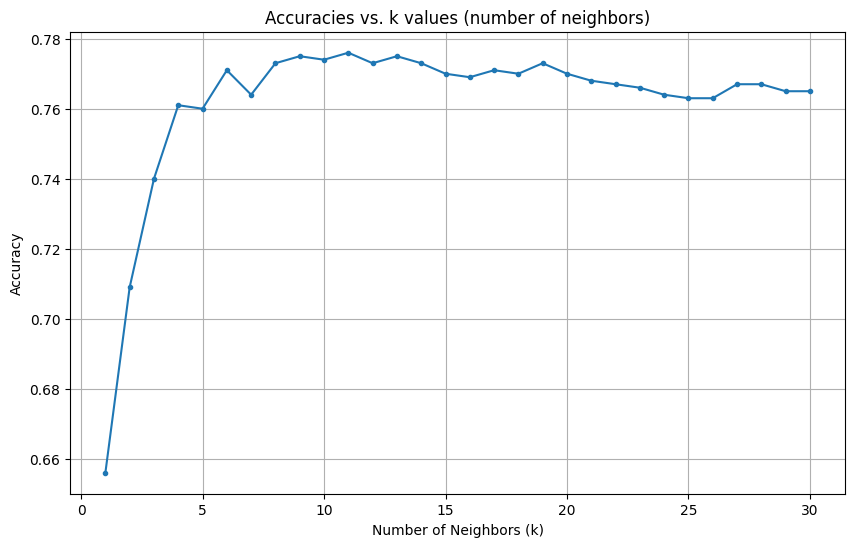

In [18]:
### Code - Plot the accuracies vs. the values for k

plt.figure(figsize=(10, 6))
plt.plot(range(1,31), accuracies, marker = '.')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Accuracies vs. k values (number of neighbors)")
plt.grid()
plt.show()

<font color = green>The value k = 11 produces the best accuracy when using leave-one-out cross-validation (accuracy = 0,776). It is slightly higher than the 0,74 accuracy obtained with the previous model (with k=3). If the number of k is still increased, the accuracy reaches a limit of about 0,77 for k=20, then it starts to slightly decrease towards 0,76. As k increases, the model starts to consider more neighbors. So, the impact of ouliers decreases and the prediction becomes a more general reflection of the dataset.</font>

<font color = green> Choosing a very small k can lead to overfitting, as the model has high variance and becomes very sensitive to outliers. On the other hand, a very large number of neighbors can cause underfitting. The high bias exhibited in this case makes it more difficult for the model to distinguish between classes (the healthy individuals and the ones with CVD).</font>

_____________________

## <font color = darkorange> 4. Ridge regression </font>

Now, we shift the focus to another kind of supervised learning - regression - as we are changing the main objective from predicting discrete classes to estimating continuous values. The following part is going to involve utilizing one regression model, <font color = darkorange>Ridge Regression</font>, and our goal is to evaluate the performance of this model. 

Thus, we will also change the dataset - the new dataset is about brushtail possums and it includes variables such as:


| Feature | Type | Explanation |
| :- | :- | :-
|sex|binary| Sex, either male (0) or female (1)
|age|numeric| Age in years
|len_head|numeric| Head length in mm
|width_skull|numeric| Skull width in mm
|len_earconch|numeric| Ear conch length in mm
|width_eye|numeric| Distance from medial canthus to lateral canthusof right eye, i.e., eye width in mm
|len_foot|numeric| Foot length in mm
|len_tail|numeric| Tail length in mm
|chest|numeric| Chest grit in mm
|belly |numeric| Belly grit in mm
|len_total|numeric| Total length in mm

In this case, our target variable will be *the age of the possum*.

In [19]:
### Loading code

# Data path
data_path = 'possum_data.csv'

# Load the data 
possum_data = pd.read_csv(data_path)

-----------

Regression allows us to examine <font color = darkorange>relationships between two or more variables</font>. This relationship is represented by an *equation*, which itself represents how a change in one variable affects another on average.

We start by examining those relationships between the variables in the given dataset.


**4. A)**

We will plot pairwise relationships between the age variable and the others, coloring the samples based on the sex variable. This will help us to find out which body dimensions are the most correlated with age.

In [20]:
### Pairplot

# Display the first 5 rows of the dataset
possum_data.head()

,sex,age,len_head,width_skull,len_earconch,width_eye,len_foot,len_tail,chest,belly,len_total
0,0,8.0,94.1,60.4,54.5,15.2,74.5,360.0,280.0,360.0,890.0
1,1,6.0,92.5,57.6,51.2,16.0,72.5,365.0,285.0,330.0,915.0
2,1,6.0,94.0,60.0,51.9,15.5,75.4,390.0,300.0,340.0,955.0
3,1,6.0,93.2,57.1,52.2,15.2,76.1,380.0,280.0,340.0,920.0
4,1,2.0,91.5,56.3,53.2,15.1,71.0,360.0,285.0,330.0,855.0


In [21]:
# Store the features (columns) other than 'age' in a list
features = possum_data.drop(columns = ['age']).columns.tolist()
print(features)

['sex', 'len_head', 'width_skull', 'len_earconch', 'width_eye', 'len_foot', 'len_tail', 'chest', 'belly', 'len_total']


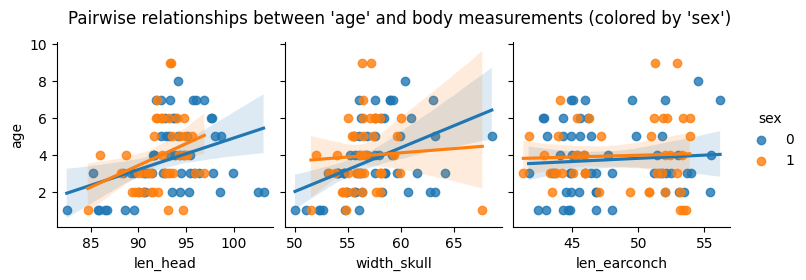

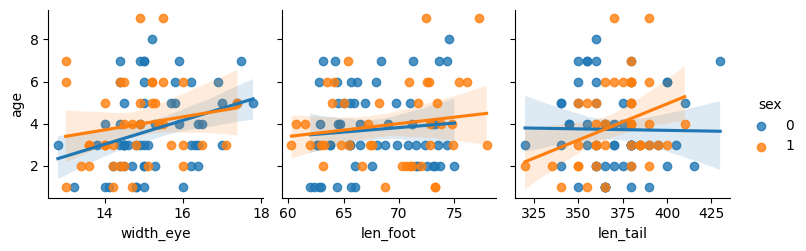

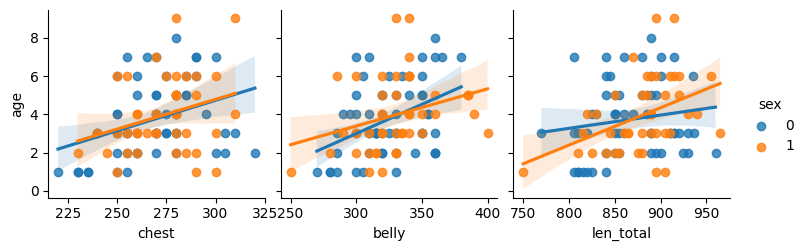

In [22]:
# Plot pairwise relationships

sns.pairplot(possum_data, x_vars = features[1:4], y_vars = ['age'], hue = 'sex', kind = 'reg')
plt.suptitle("Pairwise relationships between 'age' and body measurements (colored by 'sex')", y = 1.08)
plt.show()
sns.pairplot(possum_data, x_vars = features[4:7], y_vars = ['age'], hue = 'sex', kind = 'reg')
plt.show()
sns.pairplot(possum_data, x_vars = features[7:10], y_vars = ['age'], hue = 'sex', kind = 'reg')
plt.show()

# 3 different plots (each with 3 of the features) in order to increase the size of the individual plots
# better visual aspect, easier to interpret, like a 3x3 subplot

<font color = darkorange> Head length and total length (perhaps also the chest and belly grit) seem to be the most correlated with age, as they show an upward trend. Some variables that seem to have no correlation with age are ear conch length and foot length (also perhaps eye width), because they do not change with age and the points are only scattered around the plot.

<font color = darkorange> There are differences in the correlations between males and females. For example, in the skull width plot, the regression line goes upward for males, but remains constant for females. On the contrary, for the tail length, females show an upward trend, while for the males it stays constant with age.

------

**4. B)**

Before the regression analysis itself, let's check that our dataset is in a proper format and prepare it accordingly. We'll also perform the train-test (80/20) split as we're going to test the overall performance of the model using the test set.

In [23]:
### Code - Data preparation

possum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sex           101 non-null    int64  
 1   age           101 non-null    float64
 2   len_head      101 non-null    float64
 3   width_skull   101 non-null    float64
 4   len_earconch  101 non-null    float64
 5   width_eye     101 non-null    float64
 6   len_foot      101 non-null    float64
 7   len_tail      101 non-null    float64
 8   chest         101 non-null    float64
 9   belly         101 non-null    float64
 10  len_total     101 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 8.8 KB


In [24]:
# Define features and target variable
possum_X = possum_data.drop(columns=['age'])  # Drop 'age' as it is the target variable
possum_y = possum_data['age']

# Standardize numerical features
scaler3 = StandardScaler()

possum_numeric = possum_X.drop(columns=['sex'])  # Separate numerical features
possum_X_scaled = scaler3.fit_transform(possum_numeric)

# Transform back to DataFrame
possum_X_numeric = pd.DataFrame(possum_X_scaled, columns = possum_numeric.columns) 

# Concatenate binary feature ('sex') with the scaled features 
possum_X_prepared = pd.concat([possum_data['sex'], possum_X_numeric], axis = 1)

possum_X_prepared.head(10)

,sex,len_head,width_skull,len_earconch,width_eye,len_foot,len_tail,chest,belly,len_total
0,0,0.391091,1.114121,1.575748,0.141928,1.389467,-0.534944,0.465334,1.238441,0.414441
1,1,-0.065889,0.207174,0.758956,0.901381,0.934052,-0.280089,0.714004,0.133146,1.013103
2,1,0.362530,0.984557,0.932215,0.426723,1.594404,0.994189,1.460016,0.501578,1.970964
3,1,0.134040,0.045219,1.006469,0.141928,1.753799,0.484478,0.465334,0.501578,1.132836
4,1,-0.351501,-0.213909,1.253981,0.046996,0.592490,-0.534944,0.714004,0.133146,-0.423687
5,1,0.105479,-0.699773,1.352986,-0.807389,1.093447,-0.789800,1.460016,-0.235286,0.773638
6,0,0.733825,0.401520,0.956966,-0.807389,0.706344,-0.534944,1.460016,0.685793,0.534173
7,1,0.591019,0.207174,1.427240,-0.522594,0.979593,-0.025233,0.962675,0.501578,0.893371
8,1,0.191162,-0.213909,1.179728,0.426723,0.911281,-0.025233,0.465334,0.133146,1.013103
9,1,-0.265817,0.336738,1.303484,-0.617526,0.569720,0.229622,0.216663,-0.235286,0.534173


In [25]:
# Train-test  (80/20) split
X_train, X_test, y_train, y_test = train_test_split(possum_X_prepared, possum_y, test_size = 0.2, random_state = 2003)

# Check shapes of the data splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (80, 10)
X_test shape: (21, 10)
y_train shape: (80,)
y_test shape: (21,)


<font color = darkorange> First, I printed the possum data info to check if there are missing values and to check all the data types. No features have missing values (for the 101 entries, every feature has 101 non-null values). Also, every feature has a numerical data type (int64 or float64), which are suitable for regression. Then, I standardized the numeric features to ensure that they all have the same scale (with 0 mean and unit variance). Thus, every feature will have an equal contribution to the model.</font>

------

**4. C)**

Regarding Ridge Regression, we'll focus on the hyperparameter called $\lambda$ (lambda), the regularization term (or penalty term / L2 penalty).

We will fit a ridge regression model with the whole training set to estimate the possums' ages. The hyperparameter $\lambda$ will be set to 64. We will also evaluate the model performance using the test set and describe the results. For evaluating on the test set, a metric called mean absolute error (MAE) will be used.

In [26]:
## Code - Ridge regression

from sklearn.metrics import mean_absolute_error

# Ridge Regression model with lambda = 64
# Ridge class and its methods from scikit-learn documentation: 
# https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.Ridge.html
ridge_model = Ridge(alpha = 64)

# Fit the model on the training set
ridge_model.fit(X_train, y_train)

# Evaluate using the test set
y_pred = ridge_model.predict(X_test)

# Calculate the mean absolute error (MAE)
# from scikit-learn : https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.mean_absolute_error.html
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error =", mae.round(2))

Mean Absolute Error = 1.25


<font color = darkorange> Mean absolute error is the average of the differences between the predicted values and the true values. In our case, the MAE of 1,25 means that the predictions of the possums' ages are off by about 1,25 years from their actual ages on average. From the pairplots, we can see that the possum ages range from 0 to 10 years. So, although the model can not be considered very precise, it still performs well on the dataset (the error is relatively small given the the total age range).</font>

Now that we have fitted the regression model, let's break it down for better understanding. The model is essentially a linear regression model with an added regularization term (to deal with e.g. overfitting). We can write the equation used by the model to predict an opossum's age as:

$$
\text{Predicted age} = w_1 \times \text{Sex} + w_2 \times \text{Head length} + w_3 \times \text{Skull width} + ... + w_{10} \times \text{Total length} + \text{Bias}
$$

As mentioned earlier, regression focuses on the relationships between the features and the target variable. In the equation above, each feature contibutes a certain amount to the predicted age, based on the weight $w_i$ learned for that feature. For example, if the total length of an opossum has a large positive weight, it suggests that opossums with greater length are predicted to be older.

We will access the necessary `Ridge` class attributes in order to write down the equation used by our fitted model. For example, the `coef_` variable contains the learned weights $w_1, ..., w_{10}$ and the `intercept_` variable holds the bias term. 

In [27]:
coefficients = ridge_model.coef_ 
bias = ridge_model.intercept_ 
feature_names = possum_X.columns 

# Let's write the equation
equation = 'Predicted age = '
for i in range(len(coefficients)):
    equation += f'{coefficients[i]:.3f}*{feature_names[i]} + '

equation += f'{bias:.3f}'
print(equation)

Predicted age = 0.046*sex + 0.135*len_head + 0.055*width_skull + 0.005*len_earconch + 0.143*width_eye + -0.055*len_foot + -0.050*len_tail + 0.189*chest + 0.222*belly + 0.095*len_total + 3.866


________________
## <font color = slategrey> 5. Feature selection - most useful features in predicting cardiovascular diseases </font>

Lastly, we will return to the first dataset and try to identify <font color = slategrey>five [5] most useful features</font> for predicting the presence of the CVD. The steps needed for this job are the same as above, except for the feature selection part.

Regarding the feature selection itself, we will use <font color = slategrey>Random Forest Classifier</font> and its built-in feature importance estimation in scikit-learn.

We will evaluate the chosen model using accuracy and the area under the ROC curve (AUC), drawing the corresponding curve in a plot. In the end, we will also discuss the findings and results.

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier on the training set
# experimenting with different values for max_depth and min_samples_split
# information from scikit-learn documentation: 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
clf = RandomForestClassifier(max_depth = 10, min_samples_split = 5, random_state = 2003)
clf.fit(data_train, y_train_cvd)

# Compute feature importances and select the 5 most useful features
# using the Random Forest classifier's built-in feature importance estimation in scikit-learn
feature_importances = clf.feature_importances_

# sorting the features first in ascending order
ascending_indices = feature_importances.argsort()

# then apply slicing to reverse these ascending indices
descending_indices = ascending_indices[::-1]
# infromation from: https://www.geeksforgeeks.org/how-to-use-numpy-argsort-in-descending-order-in-python/

# Select the 5 most useful features
# using the indices corresponding to the features in descending order of the importance
features_selected = data.columns[descending_indices[0:5]]

print("Top 5 features for predicting the presence of the CVD:", list(features_selected))

Top 5 features for predicting the presence of the CVD: ['weight', 'ap_hi', 'age', 'height', 'sex']


In [29]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Create new datasets with only the 5 most useful features
X_train_selected = data_train[features_selected]
X_test_selected = data_test[features_selected]

# Train another Random Forest classifier (with only the top 5 features)
clf2 = RandomForestClassifier(max_depth = 10, min_samples_split = 5, random_state = 2003)
clf2.fit(X_train_selected, y_train_cvd)

# Predict using both predict() and predict_proba() functions
y_predict = clf2.predict(X_test_selected)
y_predict_proba = clf2.predict_proba(X_test_selected)[:, 1]

# Evaluate the model using roc_auc_score
auc1 = roc_auc_score(y_test_cvd, y_predict)
auc2 = roc_auc_score(y_test_cvd, y_predict_proba)

print("Area under the ROC curve (AUC) using predict():", auc1.round(3))
print("Area under the ROC curve (AUC) using predict_proba():", auc2.round(3))

Area under the ROC curve (AUC) using predict(): 0.638
Area under the ROC curve (AUC) using predict_proba(): 0.756


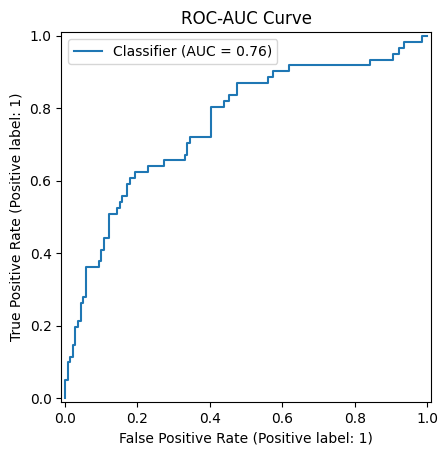

In [30]:
from sklearn.metrics import RocCurveDisplay

# Plot ROC Curve using RocCurveDisplay class and its methods from scikit-learn documentation:
# https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.RocCurveDisplay.html#

RocCurveDisplay.from_predictions(y_test_cvd, y_predict_proba)
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

<font color = slategrey> Random Forest is an estimator that fits multiple decision tree classifiers on the dataset and combines their predictions to improve the accuracy and control over-fitting. (explanation from https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). The model selects features that are relevant in predicting CVD by assigning every feature an importance score, which shows how much each one contributes to building an accurate model. </font>

<font color = slategrey> The ROC-AUC Curve shows the True Positive Rate against the False Postive Rate of the predictions (so, the further it is from the main diagonal towards the top-left corner, the better the model). The model obtained with feature selection has a good score of 0,76. </font>

<font color = slategrey> The predict() method is used to predict a category for a set of input features. It returns a discrete value that can be directly assigned to each input feature. On the other hand, the predict_proba() method returns the predicted probabilities of the input features belonging to each category. The method, instead of returning a discrete class, returns the probabilities associated with each class. (information from: https://www.educative.io/answers/difference-between-predict-and-predictproba-in-sklearn).</font>

<font color = slategrey> In order to calculate the AUC, continuous scores (e.g., probabilities) are required, not just predictions. This is because AUC evaluates the model's ability to differentiate between classes by computing the True Positive Rate and False Positive Rate at various thresholds (between 0 and 1, seen on the axes of the plot). Thus, predict(), which has a binary output based on a fixed threshold (0,5) and does not return the probabilities, is not suitable for AUC analysis. </font>